# Classificação de Sistemas Segundo a Ordem de Sua Equação Diferencial


## Sistemas de Primeira Ordem 


$$ H(s)=\frac{K}{1+s\tau}$$

Na função de transferência acima, $K$ é o ganho estático do sistema e $\tau$ é a constante de tempo. Um exemplo de sistema de primeira ordem é o filtro *RC* (filtro de primeira ordem) discutido no último *noteboook*.

A resposta ao impulso é obtida através da Transformada Inversa de Laplace. Podemos fazer isso usando Lcapy

In [1]:
from lcapy import *
K,tau=symbols('K tau')

H=K/(1+tau*s)
h=H.ILT(causal=True)
h

   -t      
   ───     
    τ      
K⋅ℯ   ⋅u(t)
───────────
     τ     

Como exemplo, considere o ganho =5 e a constante de tempo = 2. A resposta à entrada degrau pode ser encontrada como mostrado abaixo:

In [2]:
Y=H.subs({'K':5,'tau':2})*(1/s)
Y

     5     
───────────
s⋅(2⋅s + 1)

In [3]:
y=Y.ILT(causal=True)
y

  ⎛     -t ⎞     
  ⎜     ───⎟     
  ⎜      2 ⎟     
5⋅⎝1 - ℯ   ⎠⋅u(t)

O gráfico da resposta pode ser obtido como:

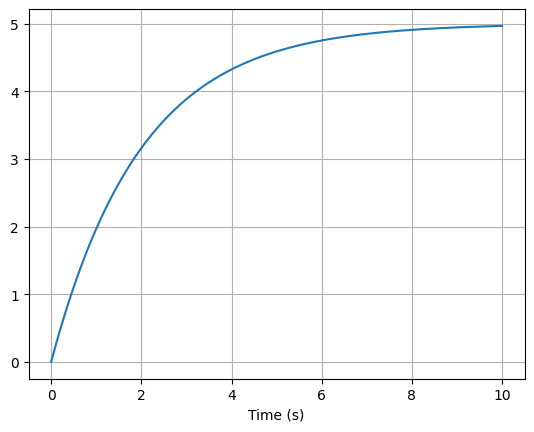

In [4]:
y.plot((0,10));

quando $t$ atinge a constante de tempo, a saída é 63,2% ($(1-e^{-1})\times 100 \%$) do valor final em regime(5), o qual neste caso é 3,16.

In [5]:
y(2).val

3.16060279414279

O *tempo de resposta* $t_r$ mede o intervalo necessário para que a resposta atinja 95\% do seu valor final, não se afastando mais do que 5 \%, a partir deste instante. . No exemplo acima, é o tempo para que $1-e^{-\frac{t_r}{\tau}}=0.95$, ou seja, $e^{-\frac{t_r}{\tau}}=0.05 \rightarrow t_r\approx 3\tau$.

O teorema do valor final permite calcular a resposta em regime estacionário, a qual é 5. Usando Lcapy obtemos o mesmo resultado, ou seja o valor final é o Ganho da função de transferência.

In [6]:
y.final_value()

5

## Sistemas de Segunda Ordem

O sistema massa-mola é um exemplo típico de sistemas de segunda ordem:

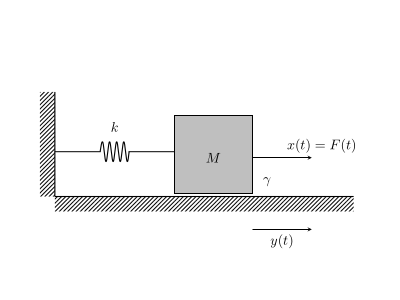

No desenho acima, $\gamma$ é o coeficiente de atrito viscoso e $k$ é a constante da mola. Nesta análise o comportamento da mola será considerado linear. Usando a segunda lei de forças de Newton para modelar o sistema, escrevemos
 
 $$My"(t)=F(t)-\gamma y'(t)-ky(t)$$
 
onde $F(t)$ é a força aplicada e a força de atrito é proporcional à velocidade da massa. Dividindo a equação acima por $M$ e isolando o termo contendo $F(t)$, 

$$y"(t)+\frac{\gamma}{M}y'(t)+\frac{k}{M}y(t)=\frac{F(t)}{M}$$

A quantidade $\sqrt{\frac{k}{M}}$ é a *frequência natural não amortecida*  $\omega_n$ do sistema. Com efeito, se $F(t)=0$ e o sistema é não amortecido $(\gamma=0)$ com a mola inicialmente comprimida ou extendida,  a solução da equação $y"(t)=-\frac{k}{M}y(t)$ é $y(t)=y_0e^{j\sqrt{\frac{k}{M}}t}=y_0e^{j\omega_n t}$, de forma que tomando apenas a parte real temos $y_0\cos(\omega_n t)$.

Definimos agora o fator de amortecimento $\zeta=\frac{\gamma}{2M\omega_n}$ e o ganho do sistema como $K=\frac{1}{k}$. Daí, $\frac{1}{M}=\frac{\omega_n^2}{k}=K\omega_n^2$ e podemos escrever que (usando $x(t)=F(t)$)

$$y"(t)+2\zeta \omega_ny'(t)+\omega_n^2y(t)=K\omega_n^2x(t).$$

Aplicando a transformada de Laplace e assumindo condições iniciais nulas resulta em 

$$(s^2+2\zeta \omega_ns+\omega_n^2)Y(s)=K\omega_n^2X(s)$$

Portanto a função de transferência do sistema é

$$H(s)=\frac{Y(s)}{X(s)}=\frac{K\omega_n^2}{s^2+2\zeta \omega_ns+\omega_n^2}$$

cujos polos são $s_{1,2}=-\zeta \omega_n \pm \omega_n\sqrt{\zeta^2-1}$. Note que para uma entrada degrau $\frac{E}{s}$ o teorema do valor final diz que a resposta em regime do sistema será $y(\infty)=\lim_{s\to0}EH(s)=EK$.
A resposta de um sistema de segunda ordem à uma entrada degrau pode ser classificada em três categorias distintas, dependendo se $\zeta^2-1 \;\mbox{é negativo, nulo ou positivo}$.


**Exemplos**

* $H(s)=\frac{3}{4s^2+12s+1}$, onde $K=3$, $\omega_n=\frac{1}{2}$ e $\zeta=3$.

In [7]:
from lcapy import *
H=tf(3,[4,12,1])
H

       3       
───────────────
   2           
4⋅s  + 12⋅s + 1

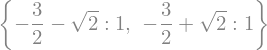

In [8]:
H.poles()



* $H(s)=\frac{3}{2s^2+2s+2}$, onde $K=\frac{3}{2}$, $\omega_n=1$ e $\zeta=\frac{1}{2}$.

In [9]:
H=tf(3,[2,2,2])
H.canonical()

      3       
──────────────
  ⎛ 2        ⎞
2⋅⎝s  + s + 1⎠

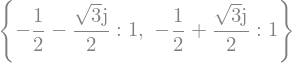

In [10]:
H.poles()

* $H(s)=\frac{3}{s^2+s+0.25}$, onde $K=12$, $\omega_n=\frac{1}{2}$ e $\zeta=1$.

In [11]:
H=tf(3,[1,1,expr(1/4)])
H

    3     
──────────
 2       1
s  + s + ─
         4

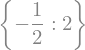

In [12]:
H.poles()

### Resposta Subamortecida ($\zeta^2 < 1$)

Quando $\zeta < 1$ os polos são complexos

$$s_{1,2}=-\zeta \omega_n \pm j\omega_n \sqrt{1-\zeta^2}$$


onde $\omega_n \sqrt{1-\zeta^2}$ é a *frequência natural amortecida* $\omega_d$. A função de transferência fatorada é

$$H(s)=\frac{K\omega_n^2}{(s+\zeta\omega_n+j\omega_d)(s+\zeta\omega_n-j\omega_d)}$$

A resposta à entrada degrau com amplitude $E$ pode ser obtida com auxílio de Lcapy. Portanto, de início definimos a função de transferência e a resposta ao degrau. 


In [13]:
from lcapy import *
K,zeta,omega_n,omega_d,E=symbols('K zeta omega_n omega_d E')

Y=K*E*(omega_n)**2/(s*((s+zeta*omega_n)**2+(omega_d)**2))
Y


             2        
       E⋅K⋅ωₙ         
──────────────────────
  ⎛   2             2⎞
s⋅⎝ω_d  + (ωₙ⋅ζ + s) ⎠

Em seguida obtemos a transformada inversa e simplificamos a expressão resultante.

In [14]:
y=Y.ILT(causal=True).simplify_sin_cos()
y

                           _________________________________________________________________________                   ↪
      2                   ╱                  6  2                                  4                    ⎛            ⎛ ↪
E⋅K⋅ωₙ ⋅u(t)             ╱                 ωₙ ⋅ζ                                 ωₙ                     ⎜            ⎜ ↪
───────────── - E⋅K⋅    ╱   ──────────────────────────────────── + ──────────────────────────────── ⋅cos⎜ω_d⋅t - atan⎜ ↪
   2     2  2          ╱                                       2                                  2     ⎜            ⎜ ↪
ω_d  + ωₙ ⋅ζ          ╱     ⎛   3  ωₙ⋅t⋅ζ         2  2  ωₙ⋅t⋅ζ⎞    ⎛   2  ωₙ⋅t⋅ζ     2  2  ωₙ⋅t⋅ζ⎞      ⎝            ⎝ ↪
                    ╲╱      ⎝ω_d ⋅ℯ       + ω_d⋅ωₙ ⋅ζ ⋅ℯ      ⎠    ⎝ω_d ⋅ℯ       + ωₙ ⋅ζ ⋅ℯ      ⎠                     ↪

↪                                            
↪      ⎛   2  ωₙ⋅t⋅ζ     2  2  ωₙ⋅t⋅ζ⎞⎞⎞     
↪ ωₙ⋅ζ⋅⎝ω_d ⋅ℯ       + ωₙ ⋅ζ ⋅ℯ      ⎠⎟⎟     
↪ ────────────

In [15]:
y=y.subs('omega_d',omega_n*sqrt(1-zeta**2)).simplify_terms()
y

           ________             ⎛        ________                    ⎞                
          ╱  -1      -ωₙ⋅t⋅ζ    ⎜       ╱      2        ⎛     ζ     ⎞⎟                
- E⋅K⋅   ╱  ────── ⋅ℯ       ⋅cos⎜ωₙ⋅t⋅╲╱  1 - ζ   - atan⎜───────────⎟⎟⋅u(t) + E⋅K⋅u(t)
        ╱    2                  ⎜                       ⎜   ________⎟⎟                
      ╲╱    ζ  - 1              ⎜                       ⎜  ╱      2 ⎟⎟                
                                ⎝                       ⎝╲╱  1 - ζ  ⎠⎠                

 A resposta do sistema subamortecido é
 
 $$y(t)=EK\left[1-\frac{e^{-\zeta\omega_n t}}{\sqrt{1-\zeta^2}}\cos\left(\omega_d t-\phi\right)\right]u(t)$$
 
 onde $\phi=\arctan\frac{\zeta}{\sqrt{1-\zeta^2}}$ (e portanto, $\sin (\phi)=\zeta$ e $\cos(\phi)=\sqrt{1-\zeta^2}$).
 
 
 
 **Exemplo** Neste exemplo são comparadas duas respostas à uma entrada degrau unitário para valores de $\zeta=\frac{1}{2}$ e $\zeta=\frac{1}{4}$.  Ainda, usamos $K=1.5$ e $\omega_n=1$:

In [16]:
y1=y.subs({'E':1,'K':1.5,'zeta': 0.5,'omega_n':1})
y1

             -t                    
             ───                   
3⋅u(t)        2     ⎛√3⋅t   π⎞     
────── - √3⋅ℯ   ⋅sin⎜──── + ─⎟⋅u(t)
  2                 ⎝ 2     3⎠     

In [17]:
y2=y.subs({'E':1,'K':1.5,'zeta': 0.25,'omega_n':1})
y2

                -t                             
                ───                            
                 4     ⎛√15⋅t       ⎛√15⎞⎞     
         2⋅√15⋅ℯ   ⋅cos⎜───── - atan⎜───⎟⎟⋅u(t)
3⋅u(t)                 ⎝  4         ⎝15 ⎠⎠     
────── - ──────────────────────────────────────
  2                        5                   

<>:1: SyntaxWarning: invalid escape sequence '\z'
<>:2: SyntaxWarning: invalid escape sequence '\z'
<>:1: SyntaxWarning: invalid escape sequence '\z'
<>:2: SyntaxWarning: invalid escape sequence '\z'
C:\Users\Avell\AppData\Local\Temp\ipykernel_2432\1587365628.py:1: SyntaxWarning: invalid escape sequence '\z'
  ax=y1.plot((-1,20),label='$\zeta=0.5$');
C:\Users\Avell\AppData\Local\Temp\ipykernel_2432\1587365628.py:2: SyntaxWarning: invalid escape sequence '\z'
  ax=y2.plot((-1,20),axes=ax,label='$\zeta=0.25$')


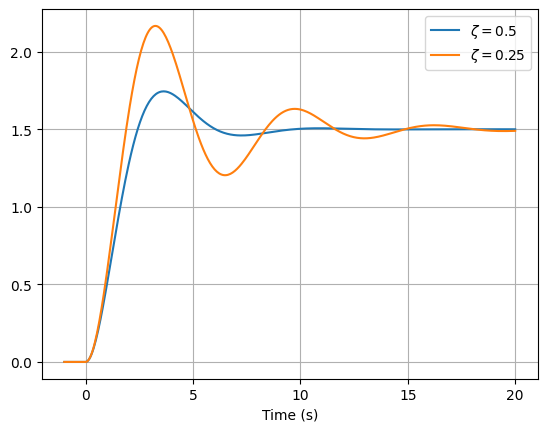

In [18]:
ax=y1.plot((-1,20),label='$\zeta=0.5$');
ax=y2.plot((-1,20),axes=ax,label='$\zeta=0.25$')
ax.legend();

#### Tempo de Pico, Máximo Sobressinal e Tempo de Resposta

O tempo de pico é o o instante no qual a resposta atinge o seu máximo valor. O máximo sobressinal é a diferença entre a resposta  em regime e o seu valor de pico relativamente ao valor de regime. 

O tempo de pico é encontrado derivando a resposta $y(t)$ com respeito ao tempo e igualando a zero, e é dado por

$$t_p=\frac{\pi}{\omega_d}.$$

Substituindo *t*= tempo de pico em $y(t)$, temos

$$y(t_p)=KE\left[1+e^{-\zeta\omega_nt_p}\right]u(t)$$

de onde pode-se escrever

$$M_p=\frac{y(t_p)-KE}{KE}=\frac{y(t_p)-y(\infty)}{y(\infty)}=e^{-\zeta\omega_nt_p}$$

A constante de tempo é $\tau=\frac{1}{\zeta\omega_n}$, a partir da inspeção do termo exponencial na resposta $y(t)$. Portanto, o tempo de resposta é

$$t_r=3\tau=\frac{3}{\zeta\omega_n}.$$

### Resposta Criticamente Amortecida ($\zeta$=1)

Quando o fator de amortecimento é 1, os polos do sistema de segunda ordem são $s_{1,2}=-\zeta\omega_n$, 2 polos reais negativos e idênticos. A função de transferência é

$$H(s)=\frac{K\omega_n^2}{(s+\zeta\omega_n)^2}$$

A reposta à uma entrada degrau com amplitude $E$ é obtida com auxílio de Lcapy. A reposta no domínio de Laplace é inicialmente definida. 


In [19]:
Y=K*E*(omega_n)**2/(s*(s+zeta*omega_n)**2)
Y

         2   
   E⋅K⋅ωₙ    
─────────────
            2
s⋅(ωₙ⋅ζ + s) 

Em seguida a transformada inversa de Laplace é obtida e simplificada:

In [20]:
y=Y.ILT(causal=True)
y=y.subs('zeta',1).simplify_terms()
y

    ⎛         ωₙ⋅t    ⎞  -ωₙ⋅t     
E⋅K⋅⎝-ωₙ⋅t + ℯ     - 1⎠⋅ℯ     ⋅u(t)

Ou seja, 

$$y(t)=EK\left(1-(1+\omega_nt)e^{-\omega_nt}\right)u(t)$$

A resposta criticamente amortecida  atinge o estado de estabilidade  no menor tempo possível sem ultrapassar o valor de
estacionário,  ou seja, sem sobresinal.

### Resposta Sobreamortecida ($\zeta > 1$)

Os polos para $\zeta >1$ são $s_{1,2}=-\zeta \omega_n \pm \omega_n\sqrt{\zeta^2-1}$. São dois polos reais distintos e negativos. Para uma entrada degrau de amplitude $E$, a resposta no domínio do tempo é:


In [21]:
from lcapy import *
K,zeta,omega_n,s_1,s_2,E=symbols('K zeta omega_n s_1 s_2 E')
Y=K*E*(omega_n)**2/(s*(s+s_1)*(s+s_2))
Y

            2      
      E⋅K⋅ωₙ       
───────────────────
s⋅(s + s₁)⋅(s + s₂)

In [22]:
y=Y.ILT(causal=True)
y

        ⎛      -s₂⋅t          -s₁⋅t            ⎞     
      2 ⎜     ℯ              ℯ              1  ⎟     
E⋅K⋅ωₙ ⋅⎜- ──────────── - ───────────── + ─────⎟⋅u(t)
        ⎝  s₂⋅(s₁ - s₂)   s₁⋅(-s₁ + s₂)   s₁⋅s₂⎠     

A expressão acima é simplificada substituindo $s_1-s_2=2\omega_n\sqrt{\zeta^2-1}$ e $s_1s_2=\omega_n^2$.  Desta forma temos que

$$y(t)=KE\left[1+\frac{\omega_n}{2\sqrt{\zeta^2-1}}\left(\frac{e^{-s_1t}}{s_1}-\frac{e^{-s_2t}}{s_2}\right)\right]u(t)$$

Como será mostrado abaixo, a resposta sobreamortecida leva muito tempo para atingir  o estado estacionário em comparação a resposta criticamente amortecida.


**Exemplo** 
Vamos estudar a resposta à entrada degrau unitário de um sistema onde $K=3$, $\omega_n=1$, para alguns valores de $\zeta$.

* $\zeta < 1\quad(\zeta=\frac{1}{8})$

In [23]:
from lcapy import *
H=tf(3,[1,expr(1/4),1])
H.ZPK()

                3                
─────────────────────────────────
⎛    1   3⋅√7⋅ⅉ⎞ ⎛    1   3⋅√7⋅ⅉ⎞
⎜s + ─ - ──────⎟⋅⎜s + ─ + ──────⎟
⎝    8     8   ⎠ ⎝    8     8   ⎠

In [24]:
Y=H*(1/s)
y1=Y.ILT(causal=True)

* $\zeta =1$

In [25]:
H=tf(3,[1,2,1])
H.ZPK()

   3    
────────
       2
(s + 1) 

In [26]:
Y=H*(1/s)
y2=Y.ILT(causal=True)

* $\zeta>1\quad (\zeta=4)$

In [27]:
H=tf(3,[1,4,1])
H.ZPK()

            3            
─────────────────────────
(s - √3 + 2)⋅(s + √3 + 2)

In [28]:
Y=H*(1/s)
y3=Y.ILT(causal=True)

<>:1: SyntaxWarning: invalid escape sequence '\z'
<>:2: SyntaxWarning: invalid escape sequence '\z'
<>:3: SyntaxWarning: invalid escape sequence '\z'
<>:1: SyntaxWarning: invalid escape sequence '\z'
<>:2: SyntaxWarning: invalid escape sequence '\z'
<>:3: SyntaxWarning: invalid escape sequence '\z'
C:\Users\Avell\AppData\Local\Temp\ipykernel_2432\132097020.py:1: SyntaxWarning: invalid escape sequence '\z'
  ax=y1.plot((-1,25),label='$\zeta$<1');
C:\Users\Avell\AppData\Local\Temp\ipykernel_2432\132097020.py:2: SyntaxWarning: invalid escape sequence '\z'
  ax=y2.plot((-1,25),axes=ax,label='$\zeta$=1')
C:\Users\Avell\AppData\Local\Temp\ipykernel_2432\132097020.py:3: SyntaxWarning: invalid escape sequence '\z'
  ax=y3.plot((-1,25),axes=ax,label='$\zeta$ >1')


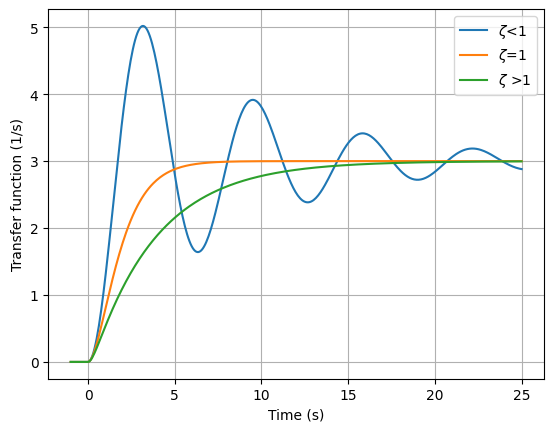

In [29]:
ax=y1.plot((-1,25),label='$\zeta$<1');
ax=y2.plot((-1,25),axes=ax,label='$\zeta$=1')
ax=y3.plot((-1,25),axes=ax,label='$\zeta$ >1')
ax.legend();

### Analogia entre o Sistema Massa-Mola e o Circuito $RLC$ série

 Seja um circuito $RLC$ série como o descrito abaixo:

In [30]:
from lcapy import *
cct = Circuit("""
P1 1 0; down 
Vi 1 0 {V(s)}; down
L 1 2; right
R 2 3; right
C 3 0_1; down
W 0 0_1;right
P2 3 0_1; down
;draw_nodes=none""")

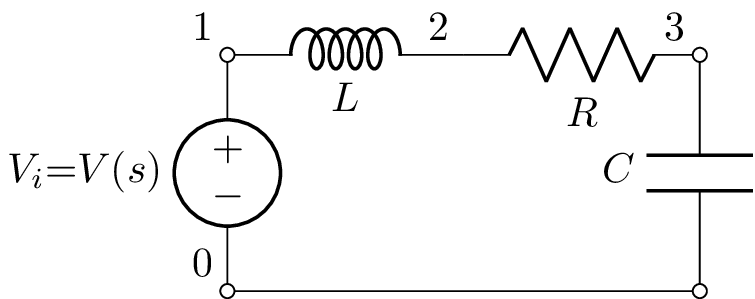

In [31]:
cct.draw()

A função de transferência para este circuito pode ser obtida através da razão entre  a tensão sobre o capacitor de saída para a tensão entre os nós 1 e 0.

In [32]:
H=cct[3].V(s)/cct[1].V(s)
H.canonical()

    ⎛ 1 ⎞     
    ⎜───⎟     
    ⎝C⋅L⎠     
──────────────
 2   R⋅s    1 
s  + ─── + ───
      L    C⋅L

Vamos comparar esta função de transferência (onde $K=1$) para aquela deduzida no sistema massa-mola.

$$\frac{K\omega_n^2}{s^2+2\zeta \omega_ns+\omega_n^2}=\frac{\frac{1}{LC}}{s^2+\frac{R}{L}s+\frac{1}{LC}}$$

Claramente vemos algumas equivalências

\begin{equation*}
\omega_n=\sqrt{\frac{k}{M}}=\frac{1}{\sqrt{LC}}\rightarrow \frac{k}{M}=\frac{1}{LC}
\label{} \tag{1}
\end{equation*}


Por outro lado, 

\begin{equation*}
2\zeta\omega_n=2\frac{\gamma}{2M\omega_n}\omega_n=\frac{\gamma}{M}=\frac{R}{L}
\label{} \tag{2}
\end{equation*}

Através das equivalências (1) e (2) vemos que a massa de um sistema mecânico corresponde a Indutância de um sistema elétrico série, o coeficiente de atrito corresponde a resistência elétrica e a constante da mola corresponde ao inverso da capacitância elétrica. 

